In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

In [3]:
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model

In [3]:
print(os.listdir("database/Train"))

['Geetansh', 'Sahil', 'Varsha']


In [4]:
SIZE = 240

In [5]:
# Training data and labels into respective lists
train_images = []
train_labels = []

In [209]:
for directory_path in glob.glob("database/Train/*"):
    label = directory_path.split("\\")[-1]
    print(label)

Geetansh
Sahil
Varsha


In [20]:
for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
    print(img_path)

database/Train\Shrey\Shrey0.jpg
database/Train\Shrey\Shrey1.jpg
database/Train\Shrey\Shrey10.jpg
database/Train\Shrey\Shrey11.jpg
database/Train\Shrey\Shrey12.jpg
database/Train\Shrey\Shrey13.jpg
database/Train\Shrey\Shrey14.jpg
database/Train\Shrey\Shrey15.jpg
database/Train\Shrey\Shrey16.jpg
database/Train\Shrey\Shrey17.jpg
database/Train\Shrey\Shrey18.jpg
database/Train\Shrey\Shrey19.jpg
database/Train\Shrey\Shrey2.jpg
database/Train\Shrey\Shrey3.jpg
database/Train\Shrey\Shrey4.jpg
database/Train\Shrey\Shrey5.jpg
database/Train\Shrey\Shrey6.jpg
database/Train\Shrey\Shrey7.jpg
database/Train\Shrey\Shrey8.jpg
database/Train\Shrey\Shrey9.jpg


In [6]:
for directory_path in glob.glob("database/Train/*"):
    label = directory_path.split("\\")[-1]
    # print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

In [7]:
len(train_labels)

60

In [8]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [5]:
test_images = []
test_labels = []

In [6]:
for directory_path in glob.glob("database/Test/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

In [7]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [12]:
# len(test_labels)
test_labels

array(['Geetansh', 'Geetansh', 'Geetansh', 'Geetansh', 'Geetansh',
       'Geetansh', 'Geetansh', 'Geetansh', 'Geetansh', 'Geetansh',
       'Sahil', 'Sahil', 'Sahil', 'Sahil', 'Sahil', 'Sahil', 'Sahil',
       'Sahil', 'Sahil', 'Sahil', 'Sahil', 'Sahil', 'Varsha', 'Varsha',
       'Varsha', 'Varsha', 'Varsha', 'Varsha', 'Varsha', 'Varsha',
       'Varsha', 'Varsha', 'Varsha', 'Varsha'], dtype='<U8')

In [9]:
#Encode labels from text to integers.
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(train_labels)
train_labels_encoded = encoder.transform(train_labels)
encoder.fit(test_labels)
test_labels_encoded = encoder.transform(test_labels)

In [255]:
test_labels_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [11]:
type(y_test)

numpy.ndarray

In [15]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [17]:
# Loading model
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

In [18]:
for layer in VGG_model.layers:
	layer.trainable = False
    
# VGG_model.summary()

In [19]:
x=Flatten()(VGG_model.output)
VGG_model = Model(inputs=VGG_model.input, outputs=x)
# VGG_model.summary()

In [20]:
# feature_extractor=VGG_model.predict(x_train)
features=VGG_model.predict(x_train)

2/2 [==============================] - 13s 6s/step


In [21]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 100, random_state = 40)

In [265]:
features.shape

(30, 25088)

In [22]:
RF_model.fit(features, y_train)

RandomForestClassifier(random_state=40)

In [23]:
VGG_model.save('featuresVGG.h5')

In [24]:
import joblib

In [25]:
# save
joblib.dump(RF_model, "RFModel.joblib")

['RFModel.joblib']

In [42]:
from tensorflow.keras.models import load_model
VGG_model = load_model("D:\\ML DEEP LEARNING FACE\\Masked Face Recognition\\featuresVGG.h5")
RF_model = joblib.load("D:\\ML DEEP LEARNING FACE\\Masked Face Recognition\\RFModel.joblib")

In [43]:
X_test_features = VGG_model.predict(x_test)
# X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

2/2 [==============================] - 8s 500ms/step


In [44]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)

In [45]:
#Inverse transform to get original label back. 
prediction_RF = encoder.inverse_transform(prediction_RF)

In [46]:
prediction_RF

array(['Geetansh', 'Geetansh', 'Geetansh', 'Geetansh', 'Geetansh',
       'Geetansh', 'Geetansh', 'Geetansh', 'Geetansh', 'Geetansh',
       'Sahil', 'Sahil', 'Geetansh', 'Geetansh', 'Sahil', 'Sahil',
       'Sahil', 'Sahil', 'Sahil', 'Sahil', 'Sahil', 'Sahil', 'Varsha',
       'Geetansh', 'Geetansh', 'Geetansh', 'Geetansh', 'Geetansh',
       'Varsha', 'Varsha', 'Varsha', 'Varsha', 'Varsha', 'Varsha'],
      dtype='<U8')

In [47]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_RF))

Accuracy =  0.7941176470588235


<AxesSubplot:>

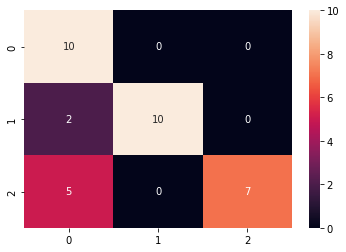

In [48]:
#Confusion Matrix - accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, prediction_RF)
sns.heatmap(cm, annot=True)

1/1 [==============================] - 0s 294ms/step
The prediction for this image is:  ['Geetansh']
The actual label for this image is:  Varsha


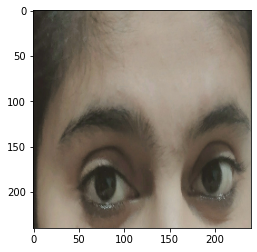

In [50]:
# For selected images
n=np.random.randint(0, x_test.shape[0])
img = x_test[n]
# img = 
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=VGG_model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
prediction_RF = encoder.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])
